In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored as cl
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [2]:
pip install termcolor


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis=1, inplace=True)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [5]:
import pandas as pd
from termcolor import colored as cl

df = pd.read_csv('creditcard.csv')

cases = len(df)
nonfraud_count = len(df[df['Class'] == 0])
fraud_count = len(df[df['Class'] == 1])
fraud_percentage = round(fraud_count / nonfraud_count * 100, 2)

print(cl('Case Statistics', attrs=['bold']))
print(cl('---------------------------------', attrs=['bold']))
print(cl('Total Cases: {}'.format(cases), attrs=['bold']))
print(cl('Non-Fraud Cases: {}'.format(nonfraud_count), attrs=['bold']))
print(cl('Fraud Cases: {}'.format(fraud_count), attrs=['bold']))
print(cl('Fraud Percentage: {}%'.format(fraud_percentage), attrs=['bold']))
print(cl('---------------------------------', attrs=['bold']))


Case Statistics
---------------------------------
Total Cases: 284807
Non-Fraud Cases: 284315
Fraud Cases: 492
Fraud Percentage: 0.17%
---------------------------------


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
import pandas as pd
from termcolor import colored as cl

df = pd.read_csv('creditcard.csv')

nonfraud_cases = df[df['Class'] == 0]
fraud_cases = df[df['Class'] == 1]

print(cl('Case Statistics:', attrs=['bold']))
print(cl('------------------------------', attrs=['bold']))
print(cl('Non-Fraud Cases Statistics', attrs=['bold']))
print(nonfraud_cases['Amount'].describe())
print(cl('------------------------------', attrs=['bold']))
print(cl('Fraud Cases Statistics', attrs=['bold']))
print(fraud_cases['Amount'].describe())
print(cl('------------------------------', attrs=['bold']))


Case Statistics:
------------------------------
Non-Fraud Cases Statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
------------------------------
Fraud Cases Statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
------------------------------


In [7]:
import pandas as pd
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('creditcard.csv')

print('Before Standardization')
print(cl(df['Amount'].head(10), attrs=['bold']))

sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print('After Standardization')
print(cl(df['Amount'].head(10), attrs=['bold']))


Before Standardization
0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
5      3.67
6      4.99
7     40.80
8     93.20
9      3.68
Name: Amount, dtype: float64
After Standardization
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [8]:
df = pd.read_csv('creditcard.csv')

X = df.drop('Class', axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(cl('X_train Samples:', attrs=['bold']), X_train[:1])
print(cl('X_test Samples:', attrs=['bold']), X_test[:1])
print(cl('y_train Samples:', attrs=['bold']), y_train[:20])
print(cl('y_test Samples:', attrs=['bold']), y_test[:20])


X_train Samples: [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02  1.29500000e+01]]
X_test Samples: [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   1.61

In [9]:
def plot_confusion_matrix(cm, classes, title, normalize=False, cmap=plt.cm.Blues):
    title = 'Confusion Matrix - {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


In [10]:
tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [11]:
print(cl('Decision Tree Model Accuracy: {}'.format(accuracy_score(y_test, tree_yhat)), attrs=['bold']))

Decision Tree Model Accuracy: 0.9993679997191109


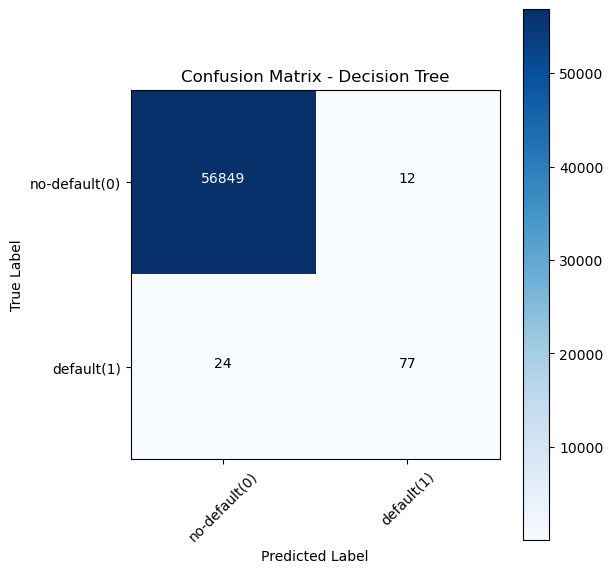

In [12]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes=['no-default(0)', 'default(1)'],
                                     normalize=False, title='Decision Tree')

plt.savefig('decision_tree.png')
plt.show()

In [13]:
n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, knn_yhat)
print(cl('Accuracy of the K-Nearest Neighbors model: {}'.format(accuracy), attrs=['bold']))

Accuracy of the K-Nearest Neighbors model: 0.9983146659176293


In [15]:
f1 = f1_score(y_test, knn_yhat)
print(cl('F1-score of the K-Nearest Neighbors model: {}'.format(f1), attrs=['bold']))

F1-score of the K-Nearest Neighbors model: 0.09433962264150944


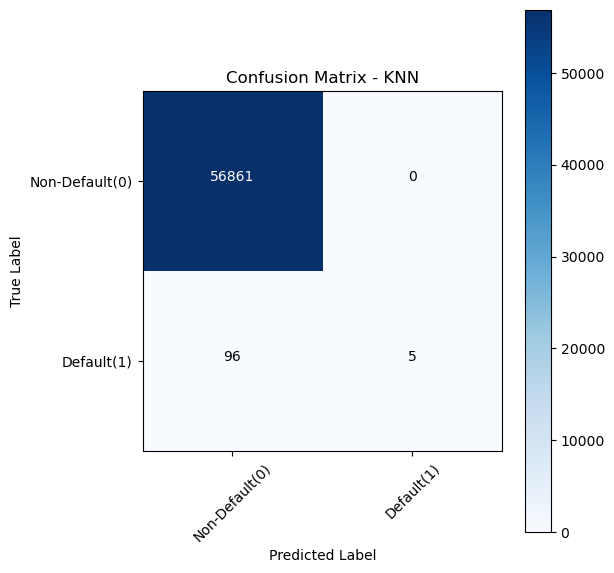

In [16]:
knn_matrix = confusion_matrix(y_test, knn_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

knn_cm_plot = plot_confusion_matrix(knn_matrix, classes=['Non-Default(0)', 'Default(1)'],
                                    normalize=False, title='KNN')

plt.savefig('knn_cm_plot.png')
plt.show()

In [18]:
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [19]:
accuracy_lr = accuracy_score(y_test, lr_yhat)
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_lr), attrs=['bold'], color='red'))

Accuracy score of the Logistic Regression model is 0.9990695551420246


In [20]:
f1_lr = f1_score(y_test, lr_yhat)
print(cl('F1-score of the Logistic Regression model: {}'.format(f1_lr), attrs=['bold']))

F1-score of the Logistic Regression model: 0.6826347305389221


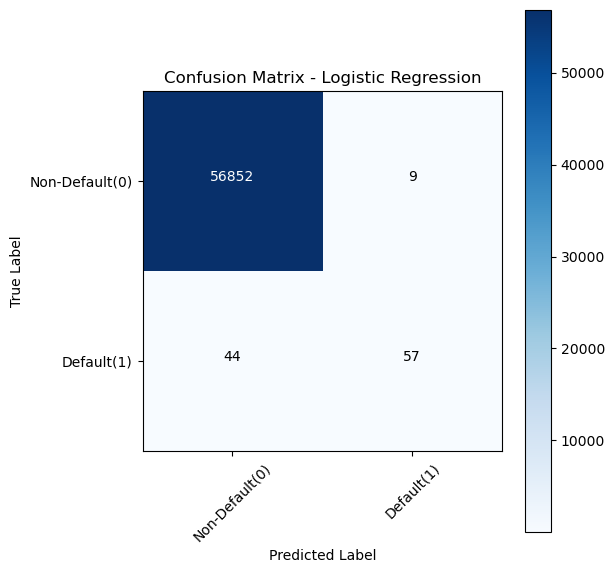

In [21]:
lr_matrix = confusion_matrix(y_test, lr_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

lr_cm_plot = plot_confusion_matrix(lr_matrix, classes=['Non-Default(0)', 'Default(1)'],
                                   normalize=False, title='Logistic Regression')

plt.savefig('lr_cm_plot.png')
plt.show()

In [22]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [23]:
accuracy_svm = accuracy_score(y_test, svm_yhat)
print(cl('Accuracy score of the Support Vector Machine model is {}'.format(accuracy_svm), attrs=['bold'], color='red'))

Accuracy score of the Support Vector Machine model is 0.9982268881008391


In [24]:
f1_svm = f1_score(y_test, svm_yhat)
print(cl('F1-score of the Support Vector Machine model: {}'.format(f1_svm), attrs=['bold']))

F1-score of the Support Vector Machine model: 0.0


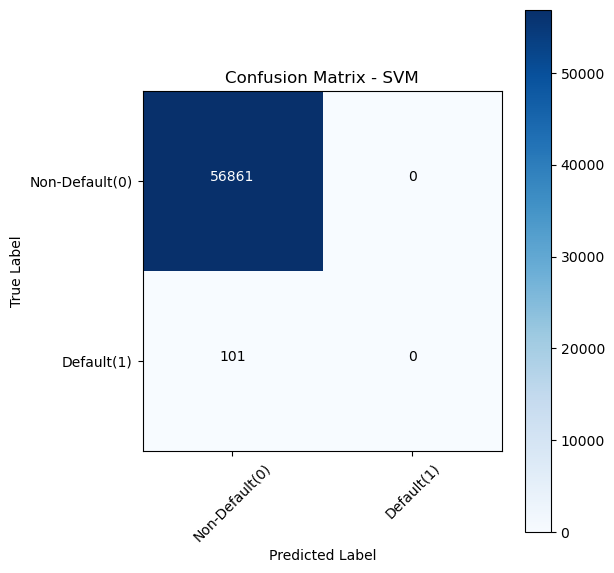

In [25]:
svm_matrix = confusion_matrix(y_test, svm_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, classes=['Non-Default(0)', 'Default(1)'],
                                    normalize=False, title='SVM')

plt.savefig('svm_cm_plot.png')
plt.show()

In [26]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [27]:
accuracy_rf = accuracy_score(y_test, rf_yhat)
print(cl('Accuracy score of the Random Forest model is {}'.format(accuracy_rf), attrs=['bold'], color='red'))

Accuracy score of the Random Forest model is 0.9993153330290369


In [28]:
f1_rf = f1_score(y_test, rf_yhat)
print(cl('F1-score of the Random Forest model: {}'.format(f1_rf), attrs=['bold']))

F1-score of the Random Forest model: 0.7796610169491525


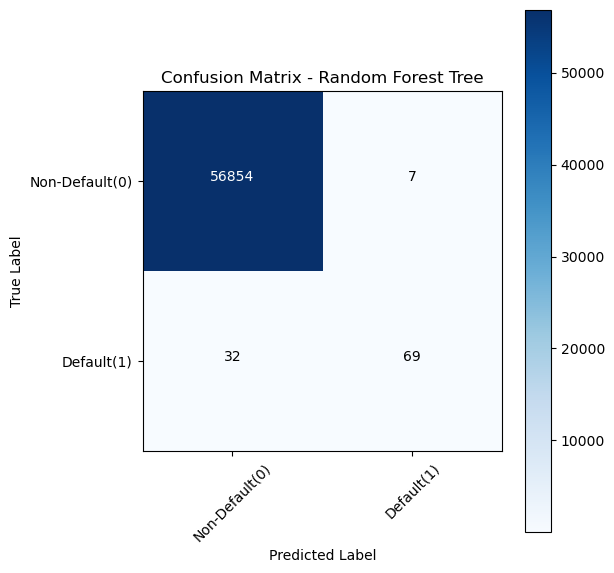

In [29]:
rf_matrix = confusion_matrix(y_test, rf_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

rf_cm_plot = plot_confusion_matrix(rf_matrix, classes=['Non-Default(0)', 'Default(1)'],
                                   normalize=False, title='Random Forest Tree')

plt.savefig('rf_cm_plot.png')
plt.show()

In [30]:
xgb = XGBClassifier(max_depth=4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [31]:
accuracy_xgb = accuracy_score(y_test, xgb_yhat)
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_xgb), attrs=['bold'], color='red'))

Accuracy score of the XGBoost model is 0.9995962220427653


In [32]:
f1_xgb = f1_score(y_test, xgb_yhat)
print(cl('F1-score of the XGBoost model: {}'.format(f1_xgb), attrs=['bold']))

F1-score of the XGBoost model: 0.8795811518324607


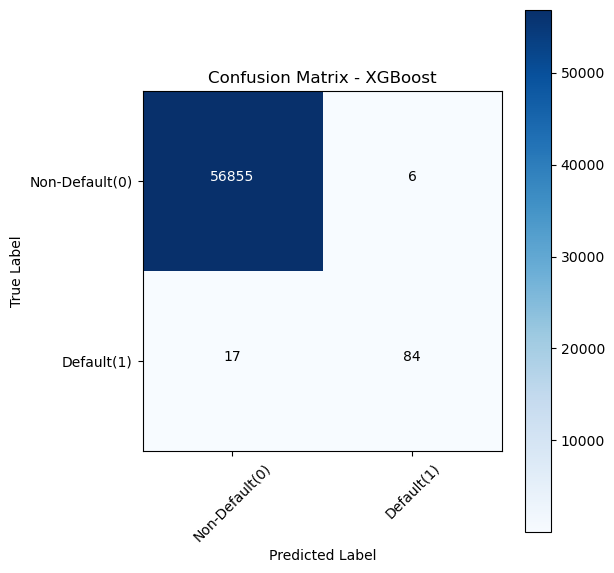

In [33]:
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, classes=['Non-Default(0)', 'Default(1)'],
                                    normalize=False, title='XGBoost')

plt.savefig('xgb_cm_plot.png')
plt.show()